### [Scatter(산점도) Plot 살펴보기]
-용도 : 2개 이상의 컬럼들의 관계 정도를 시각화 하는 그래프
-corr()

In [1]:
import pandas as pd
import numpy as np

In [2]:
def histogram_intersection(a, b):
    v = np.minimum(a, b).sum().round(decimals=1)
    return v
df = pd.DataFrame([(.2, .3), (.0, .6), (.6, .0), (.2, .1)],
                  columns=['dogs', 'cats'])
df.corr(method=histogram_intersection)

,dogs,cats
dogs,1.0,0.3
cats,0.3,1.0


In [3]:
df.corr()

,dogs,cats
dogs,1.000000,-0.851064
cats,-0.851064,1.000000


In [4]:
df = pd.DataFrame([(1, 1), (2, np.nan), (np.nan, 3), (4, 4)],columns=['dogs', 'cats'])
df

,dogs,cats
0,1.0,1.0
1,2.0,NaN
2,NaN,3.0
3,4.0,4.0


In [5]:
df.corr(numeric_only=True,min_periods=2)  #min_periods는 최소한 저 숫자만큼 비교한다 ....

,dogs,cats
dogs,1.0,1.0
cats,1.0,1.0


(2) 데이터 준비<hr>

In [6]:
file='../DATA/auto-mpg.csv'

(3) 데이터 저장  => CSV---->DataFrame

In [7]:
mpgDF=pd.read_csv(file,sep='\s+',
                  names=['mpg','cylinders','displacement','horsepower','weight','acceleration','model year','origin','car name'])

In [8]:
mpgDF.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


(4) 데이터 정보 확인

- 전체 데이터 간략 정보 확인 => info()

In [9]:
mpgDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [10]:
# 일단 결측치 확인

-실제 데이터의 값의 종류 즉 고유값 확인 필요=> unique(),nunique()
   * 각 컬럼의 이상한 값 즉, 이상치 확인
   * 각 컬럼의 값의 종류 및 범위
   * 각 컬럼의 실제 데이터 타입

In [11]:
for col in mpgDF.columns:
    print(mpgDF[col].nunique(),mpgDF[col].unique,sep='\n',end='\n\n')


129
<bound method Series.unique of 0      18.0
1      15.0
2      18.0
3      16.0
4      17.0
       ... 
393    27.0
394    44.0
395    32.0
396    28.0
397    31.0
Name: mpg, Length: 398, dtype: float64>

5
<bound method Series.unique of 0      8
1      8
2      8
3      8
4      8
      ..
393    4
394    4
395    4
396    4
397    4
Name: cylinders, Length: 398, dtype: int64>

82
<bound method Series.unique of 0      307.0
1      350.0
2      318.0
3      304.0
4      302.0
       ...  
393    140.0
394     97.0
395    135.0
396    120.0
397    119.0
Name: displacement, Length: 398, dtype: float64>

94
<bound method Series.unique of 0      130.0
1      165.0
2      150.0
3      150.0
4      140.0
       ...  
393    86.00
394    52.00
395    84.00
396    79.00
397    82.00
Name: horsepower, Length: 398, dtype: object>

351
<bound method Series.unique of 0      3504.0
1      3693.0
2      3436.0
3      3433.0
4      3449.0
        ...  
393    2790.0
394    2130.0
395    2295.0
396

In [12]:
# dropna 파라미터 설정으로 컬럼의 결측치 데이터 수까지 확인 가능
mpgDF['origin'].nunique(dropna=False),mpgDF['origin'].unique()   #dropna=False (결측치를 버리지 않겠다...)=기본이 원래 결측치 계산 안함...

(3, array([1, 3, 2], dtype=int64))

(5) 데이터 전처리 <hr>
- 결측치 체크 => 꼭 결측치가 Nan이 아닐 수 있음
- 중복값 체크
- 이상치 체크=> 정말 컬럼의 범위를 벗어난 값,잘못 입력된 값
- 데이터 표준화=> 자료형,데이터 단위 일치
- 데이터 정규화=> 데이터의 크기 일치

(5-1) 결측치 체크 및 처리 ===> 이상한 값 즉 이상치 NaN으로 변환 후 처리

In [13]:
mpgDF.horsepower.value_counts()['?']

6

In [14]:
mpgDF['horsepower'].replace('?',np.nan,inplace=True)

In [15]:
mpgDF.dropna()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.00,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.00,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.00,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.00,2625.0,18.6,82,1,ford ranger


In [16]:
mpgDF['horsepower'].isnull().sum()

6

(5-2) 데이터 표준화= horsepower의 자료형을 실제 데이터와 일치

In [17]:
mpgDF.horsepower=mpgDF.horsepower.astype('float32')

In [18]:
mpgDF.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float32
weight          float64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

(5-2) 데이터 표준화= > 연속형 즉 수치 자료형 ====> 범주형 자료형 변환
* 46~230 범위 실수 수치값===> 저출력/중출력/고출력
* 구간분할(bining)

In [19]:
mpgDF.horsepower.describe()

count    392.000000
mean     104.469391
std       38.491138
min       46.000000
25%       75.000000
50%       93.500000
75%      126.000000
max      230.000000
Name: horsepower, dtype: float64

In [20]:
pd.cut(np.array([1, 7, 5, 4, 6, 3]), 3,include_lowest=True)

[(0.993, 3.0], (5.0, 7.0], (3.0, 5.0], (3.0, 5.0], (5.0, 7.0], (0.993, 3.0]]
Categories (3, interval[float64, right]): [(0.993, 3.0] < (3.0, 5.0] < (5.0, 7.0]]

In [21]:
pd.cut(np.array([1, 7, 5, 4, 6, 3]), 3,labels=['초영아','영아','유아'])

['초영아', '유아', '영아', '영아', '유아', '초영아']
Categories (3, object): ['초영아' < '영아' < '유아']

In [22]:
out,ret=pd.cut(mpgDF.horsepower,bins=3,labels=['저마력','중마력','고마력'],retbins=True)
type(out),ret

(pandas.core.series.Series,
 array([ 45.816     , 107.33333333, 168.66666667, 230.        ]))

In [23]:
mpgDF['horsepower']=out
mpgDF.dtypes

mpg              float64
cylinders          int64
displacement     float64
horsepower      category
weight           float64
acceleration     float64
model year         int64
origin             int64
car name          object
dtype: object

In [24]:
s=pd.Series(list('abca'))
s

0    a
1    b
2    c
3    a
dtype: object

In [25]:
pd.get_dummies(s)

,a,b,c
0,True,False,False
1,False,True,False
2,False,False,True
3,True,False,False


(5-3) 데이터 표준화 => 범주형 ==> 연속형/수치화 변환 : One-Hot-Encoding 방식

In [26]:
# pandas.get_dummies()함수
# mpgDF에 origin 컬럼을 변환 ==> 1,2,3 범주형

In [27]:
pd.get_dummies(mpgDF.origin)

,1,2,3
0,True,False,False
1,True,False,False
2,True,False,False
3,True,False,False
4,True,False,False
...,...,...,...
393,True,False,False
394,False,True,False
395,True,False,False
396,True,False,False


In [28]:
# pandas.get_dummies()함수
# mpgDF에 origin 컬럼을 변환 ==> 'USA','EU','JPN' 변환

In [29]:
mpgDF['origin'].replace({1:'USA',2:'EU',3:'JPN'},inplace=True)

In [30]:
mpgDF['origin']=mpgDF['origin'].astype('category')

In [31]:
mpgDF.dtypes

mpg              float64
cylinders          int64
displacement     float64
horsepower      category
weight           float64
acceleration     float64
model year         int64
origin          category
car name          object
dtype: object

(6) 데이터 분석

(6-1) 연비 mpg 컬럼과 관계가 가장 높은 컬럼

In [32]:
corrDF=mpgDF.corr(numeric_only=True)
corrDF['mpg'][1:]

cylinders      -0.775396
displacement   -0.804203
weight         -0.831741
acceleration    0.420289
model year      0.579267
Name: mpg, dtype: float64

In [33]:
corrDF['mpg'][1:].sort_values()

weight         -0.831741
displacement   -0.804203
cylinders      -0.775396
acceleration    0.420289
model year      0.579267
Name: mpg, dtype: float64

In [34]:
round(corrDF['mpg']['weight'],2)

-0.83

In [35]:
### 시각화로 연비 mpg 컬럼의 관계 확인
import matplotlib.pyplot as plt

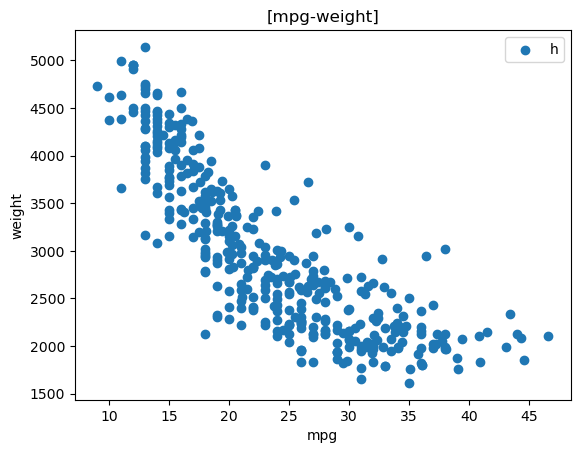

In [36]:
plt.scatter(mpgDF['mpg'],mpgDF['weight'])
plt.xlabel('mpg')
plt.ylabel('weight')
plt.title('[mpg-weight]')
plt.legend('hit yu jung hyun')
plt.show()
          
            

In [37]:
def printScatter(col1,col2):
    '''
    parameters:
        col1,col2:column name
    '''
    plt.scatter(mpgDF[col1],mpgDF[col2])
    plt.title(f'[{col1}-{col2}:{corrDF[col1][col2]}]')
    plt.xlabel(col1.name)
    plt.ylabel(col2.name)
    plt.show()

In [38]:
# for col in corrDF.columns[1:]:
#     printScatter('mpg',col)

In [39]:
def scatterplot(sr1,sr2):
    plt.scatter(sr1,sr2)
    plt.title(f'{sr1.name}-{sr2.name} [{round(corrDF[sr1.name][sr2.name],2)}]')
    plt.xlabel(sr1.name)
    plt.ylabel(sr2.name)
    plt.show()

(6-2) 자동차 제조사의 데이터 비율

In [40]:
originSR=mpgDF['origin'].value_counts()
originSR.index,originSR.values


(CategoricalIndex(['USA', 'JPN', 'EU'], categories=['EU', 'JPN', 'USA'], ordered=False, dtype='category', name='origin'),
 array([249,  79,  70], dtype=int64))

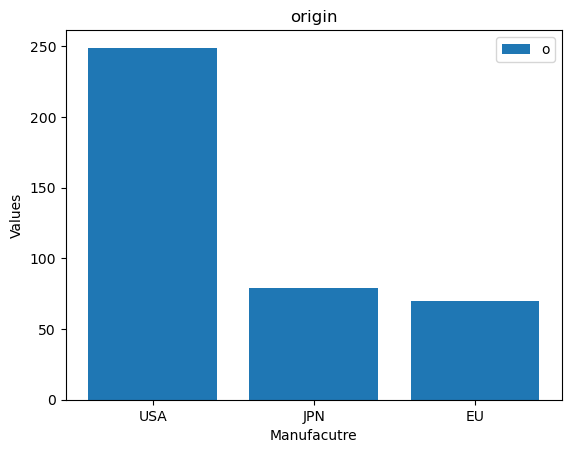

In [41]:
plt.bar(originSR.index,originSR.values)
plt.title('origin')
plt.xlabel('Manufacutre')
plt.ylabel('Values')
plt.legend('origin')
plt.show()

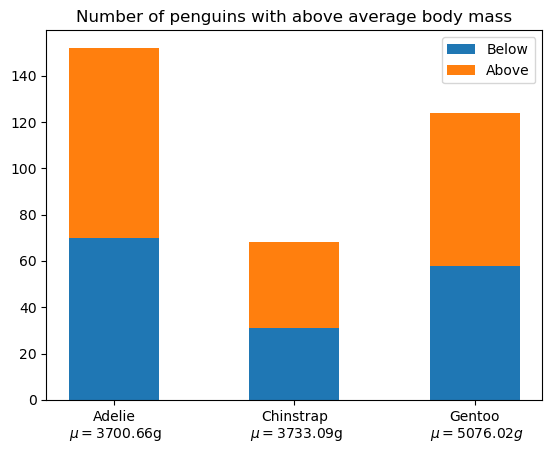

In [42]:
import matplotlib.pyplot as plt
import numpy as np

# data from https://allisonhorst.github.io/palmerpenguins/

species = (
    "Adelie\n $\\mu=$3700.66g",
    "Chinstrap\n $\\mu=$3733.09g",
    "Gentoo\n $\\mu=5076.02g$",
)
weight_counts = {
    "Below": np.array([70, 31, 58]),
    "Above": np.array([82, 37, 66]),
}
width = 0.5

fig, ax = plt.subplots()
bottom = np.zeros(3)

for boolean, weight_count in weight_counts.items():
    p = ax.bar(species, weight_count, width, label=boolean, bottom=bottom)
    bottom += weight_count

ax.set_title("Number of penguins with above average body mass")
ax.legend(loc="upper right")

plt.show()

- 다중 그래프
- 방법1)fig,ax=plt.subplot
- 방법2)plt.subplot(행,열,인)plt.subplot(3,1,1),plt.subplot(3,1,2),plt.subplot(3,1,2)
  

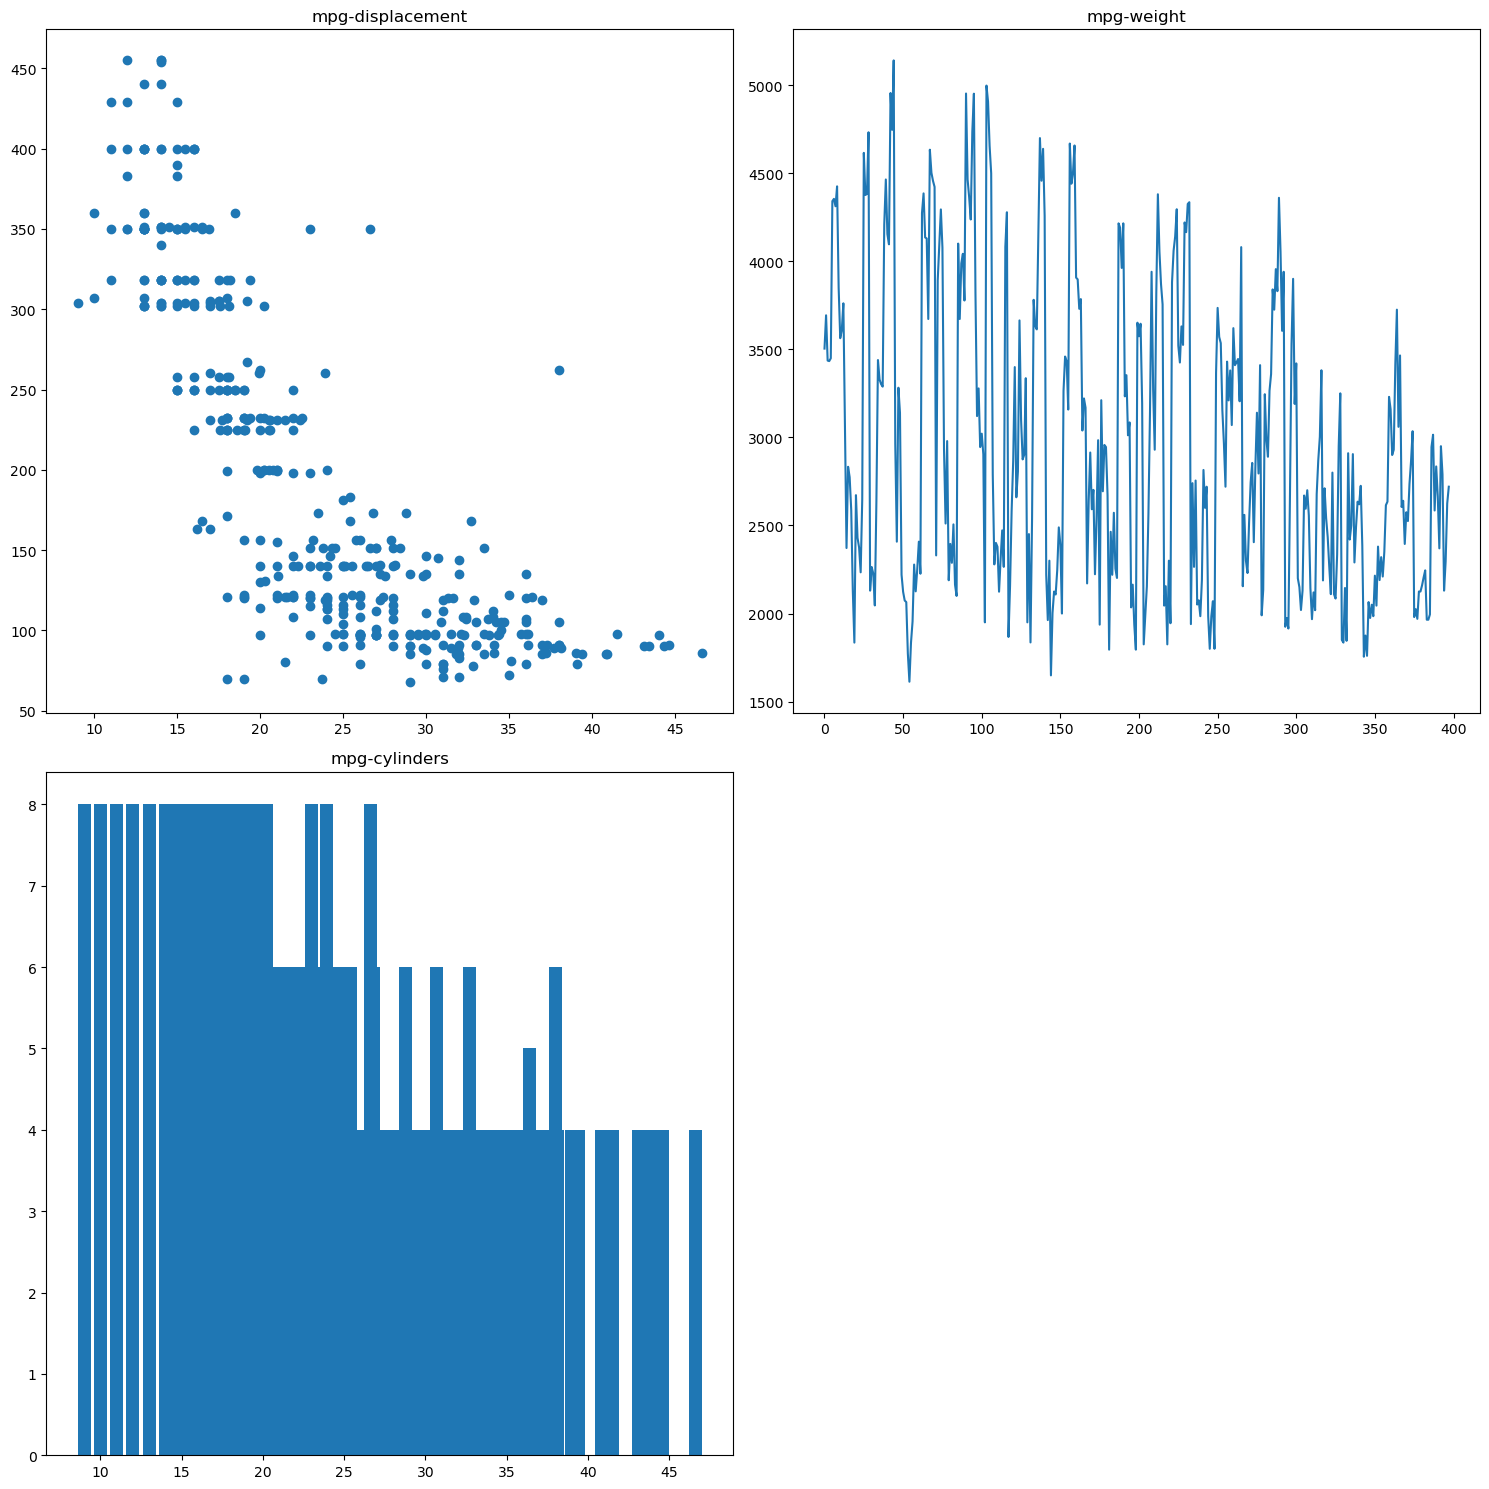

In [43]:
plt.figure(figsize=(15,15))
plt.subplot(2, 2, 1)        #2행 2열 중 첫 번째
plt.scatter(mpgDF['mpg'], mpgDF['displacement'])
plt.title("mpg-displacement")

plt.subplot(2,2,2)          # 2행 2열 중 두 번째
plt.plot(mpgDF['weight'])
plt.title("mpg-weight")

plt.subplot(2,2,3)          # 2행 2열 중 세 번째
plt.bar(mpgDF['mpg'], mpgDF['cylinders'])
plt.title("mpg-cylinders")

plt.tight_layout() # 여러 개의 그래프가 겹치지 않게 최소한의 여백 지정해주는 함수
plt.show()

방법2) subplots

In [46]:
fig,ax=plt.subplots

ax1=fig.add_subplot(311)
ax1.scatter(mpgDF['mpg'],mpgDF['weight'])
ax1.set_title("mpg-weight")

ax2=fig.add_subplot(311)
ax2.scatter(mpgDF['mpg'],mpgDF['weight'])
ax2.set_title("mpg-weight")

ax3=fig.add_subplot(311)
ax3.scatter(mpgDF['mpg'],mpgDF['weight'])
ax3.set_title("mpg-cylinder")

plt.tight_layout()
plt.show()

TypeError: cannot unpack non-iterable function object

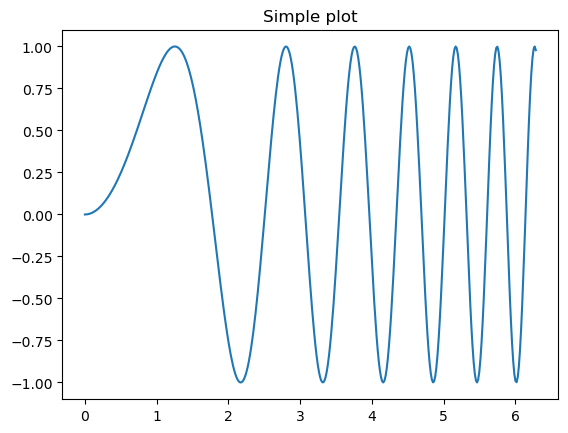

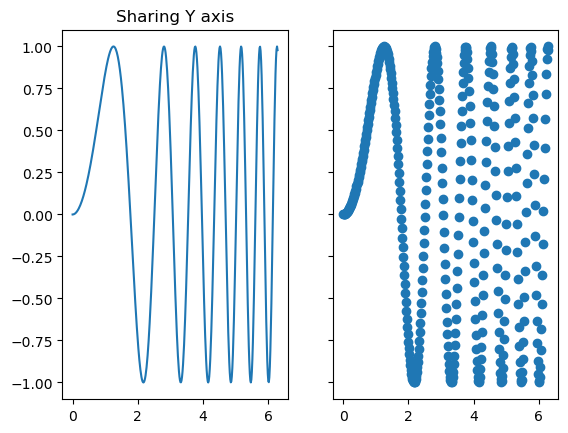

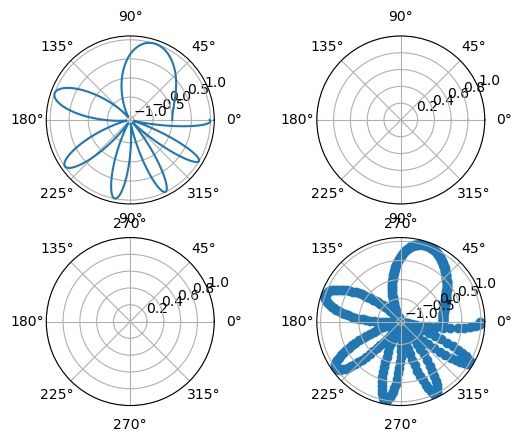

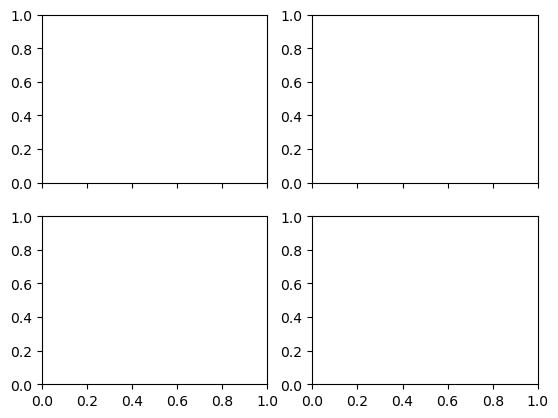

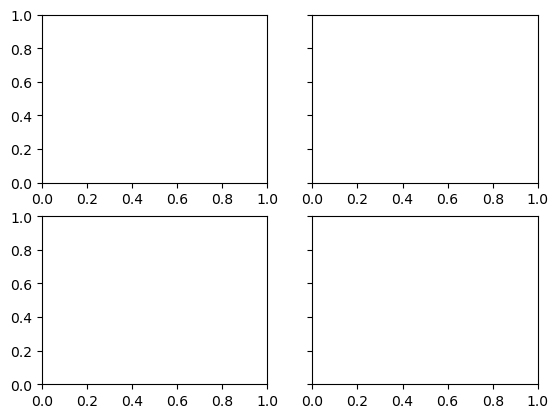

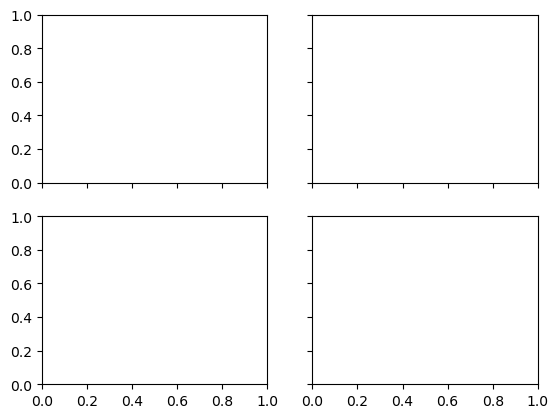

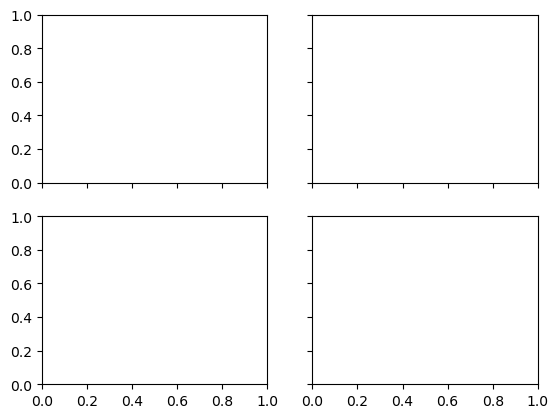

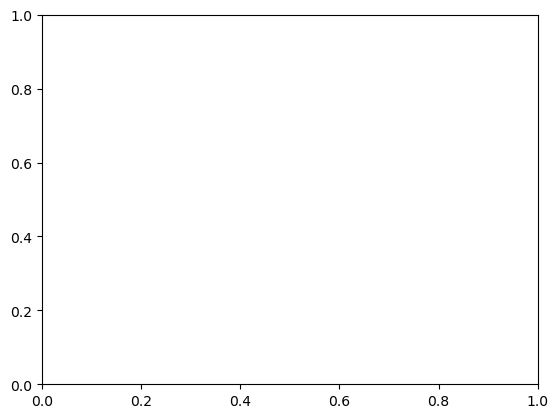

In [47]:
# First create some toy data:
x = np.linspace(0, 2*np.pi, 400)
y = np.sin(x**2)

# Create just a figure and only one subplot
fig, ax = plt.subplots()
ax.plot(x, y)
ax.set_title('Simple plot')

# Create two subplots and unpack the output array immediately
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.plot(x, y)
ax1.set_title('Sharing Y axis')
ax2.scatter(x, y)

# Create four polar axes and access them through the returned array
fig, axs = plt.subplots(2, 2, subplot_kw=dict(projection="polar"))
axs[0, 0].plot(x, y)
axs[1, 1].scatter(x, y)

# Share a X axis with each column of subplots
plt.subplots(2, 2, sharex='col')

# Share a Y axis with each row of subplots
plt.subplots(2, 2, sharey='row')

# Share both X and Y axes with all subplots
plt.subplots(2, 2, sharex='all', sharey='all')

# Note that this is the same as
plt.subplots(2, 2, sharex=True, sharey=True)

# Create figure number 10 with a single subplot
# and clears it if it already exists.
fig, ax = plt.subplots(num=10, clear=True)

Text(0.5, 1.0, 'Simple plot')

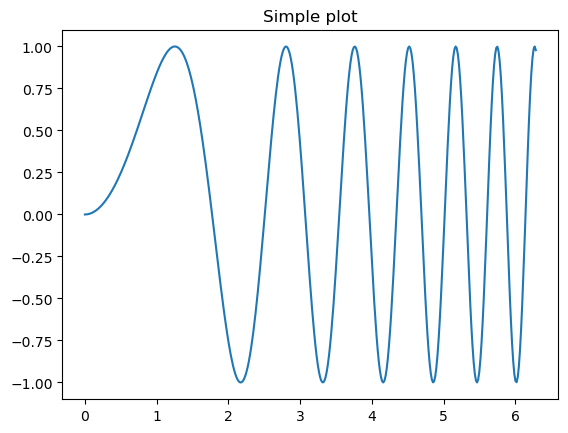

In [49]:
# Create just a figure and only one subplot
fig, ax = plt.subplots()
ax.plot(x, y)
ax.set_title('Simple plot')

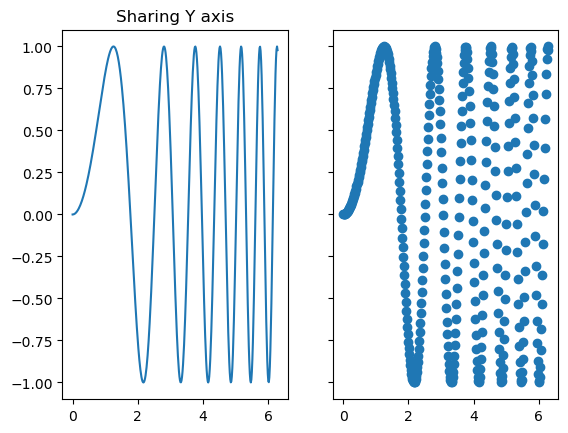

In [48]:
# Create two subplots and unpack the output array immediately
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)  #y축을 공유
ax1.plot(x, y)
ax1.set_title('Sharing Y axis')
ax2.scatter(x, y)

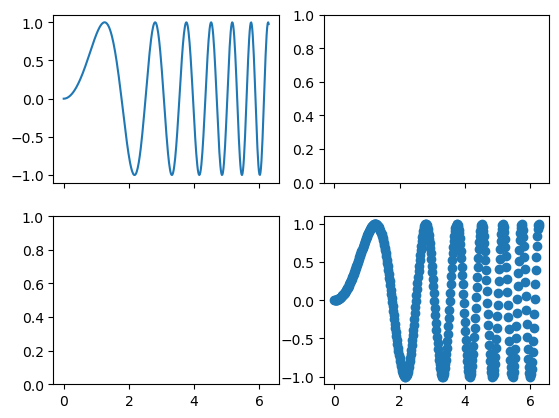

In [58]:
# Create four polar axes and access them through the returned array
fig, axs = plt.subplots(2, 2,sharex='col')
axs[0, 0].plot(x, y)
axs[1, 1].scatter(x, y)

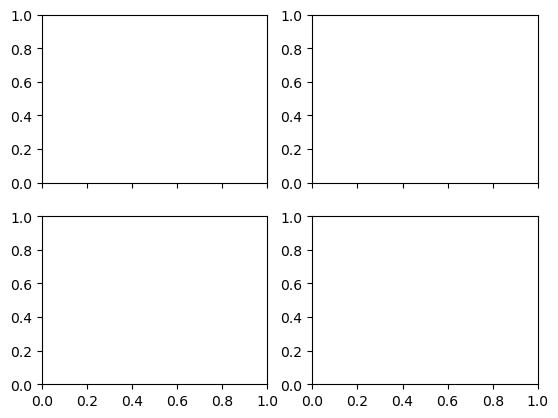

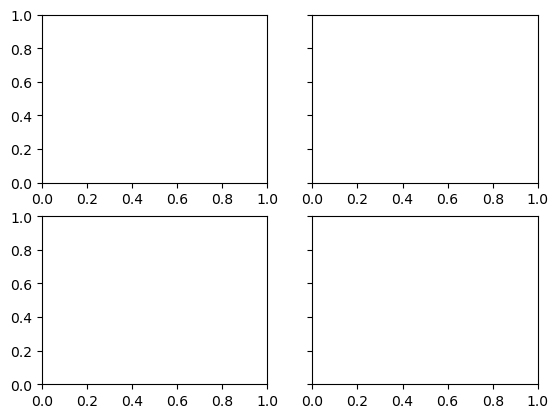

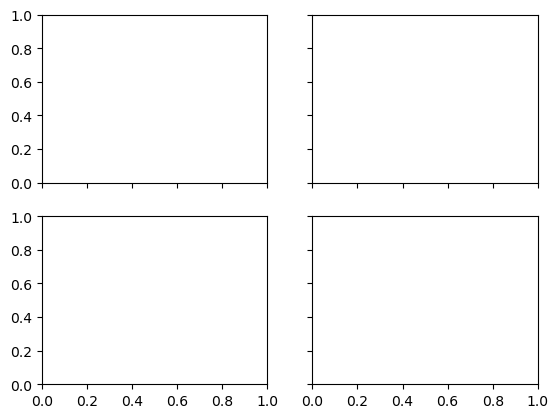

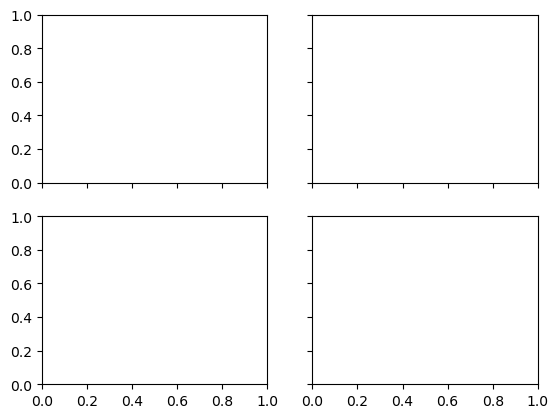

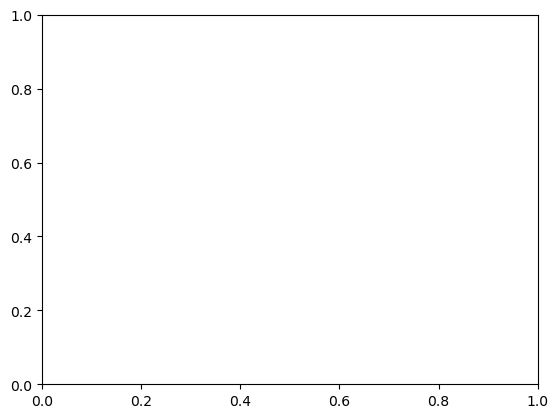

In [56]:
# Share a X axis with each column of subplots
plt.subplots(2, 2, sharex='col')

# Share a Y axis with each row of subplots
plt.subplots(2, 2, sharey='row')

# Share both X and Y axes with all subplots
plt.subplots(2, 2, sharex='all', sharey='all')

# Note that this is the same as
plt.subplots(2, 2, sharex=True, sharey=True)

# Create figure number 10 with a single subplot
# and clears it if it already exists.
fig, ax = plt.subplots(num=10, clear=True)

ValueError: The Axes must have been created in the present figure

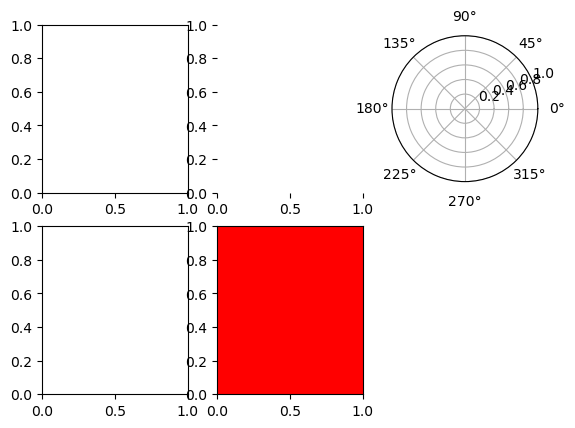

In [59]:
fig = plt.figure()

fig.add_subplot(231)
ax1 = fig.add_subplot(2, 3, 1)  # equivalent but more general

fig.add_subplot(232, frameon=False)  # subplot with no frame
fig.add_subplot(233, projection='polar')  # polar subplot
fig.add_subplot(234, sharex=ax1)  # subplot sharing x-axis with ax1
fig.add_subplot(235, facecolor="red")  # red subplot

ax1.remove()  # delete ax1 from the figure
fig.add_subplot(ax1)  # add ax1 back to the figure